# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [93]:
setwd("C:/Users/roman/OneDrive/Documents/Python Scripts/Lapadat_DSPN_S22/book/exercises/unrestricted_trimmed_1_7_2020_10_50_44")
unrestricted_trimmed  <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

install.packages("ISLR")

library(tidyverse)
library(ISLR)
library(ggplot2)

d1  <- unrestricted_trimmed %>%
    select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    drop_na()


head(unrestricted_trimmed)
head(d1)
dim(d1)

Warning message:
"package 'ISLR' is in use and will not be installed"


,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


[1] 1113    6

(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

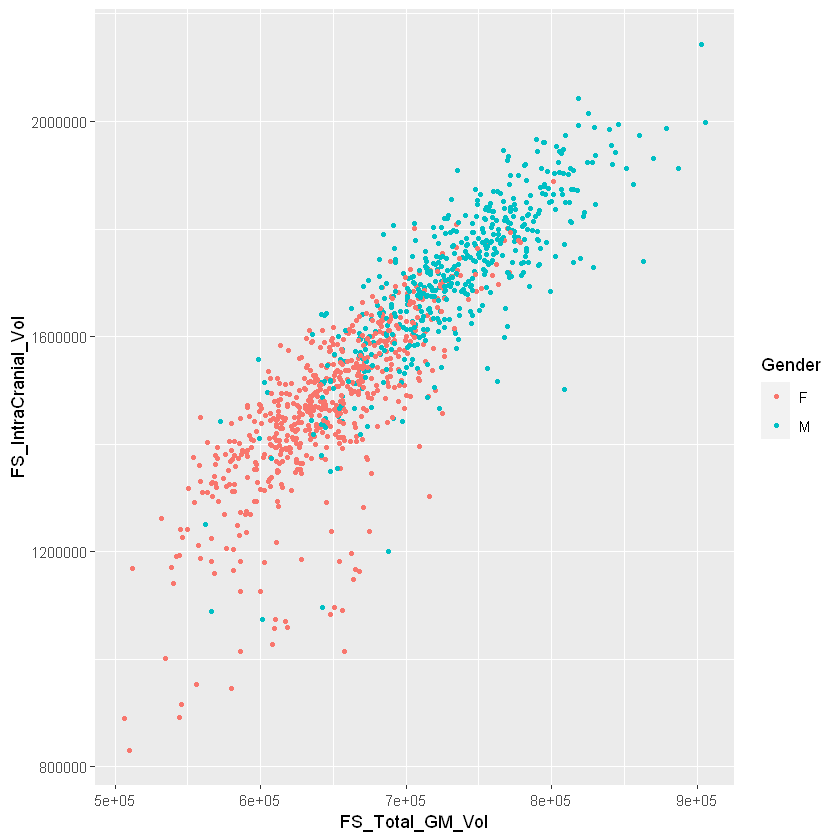

In [94]:
# WRITE YOUR CODE HERE

ggplot(d1, aes(x=FS_Total_GM_Vol, y=FS_IntraCranial_Vol, color = Gender)) + geom_point(size = 1)

What patterns do you observe in the scatter plot?

> *Write your response here* 
> Intracranial volume appears to have a mild-strong positive correlation with total gray matter volume. There is something that causes males to have higher intracranial volume and total gray matter volume (if I had to guess, the fact that males tend to have larger skulls v. the female of the species, and this holds true for homo sapiens).

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [95]:
#Pre GLM: You have to make Gender into a Factor or else the glm will complain that "y must be between 0 and 1."

d1$Gender  <- as.factor(d1$Gender)

In [96]:
# WRITE YOUR CODE HERE
glm.fit.1  <- glm(Gender~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = "binomial")
#glm.fit.1
summary(glm.fit.1)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = "binomial", data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Total Gray matter volume, total Intracranial volume.* 
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [98]:
glm_prob_df = data.frame(predict(glm.fit.1, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')

num_observations = nrow(glm_prob_df)

#Here, smartass:
threshold = .5

glm_prob_df$predicted_binary=rep("Female", num_observations)
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="Male"

confusion_df = data.frame(glm_prob_df$predicted_binary, d1$Gender)
colnames(confusion_df) = c('predicted', 'actual')
table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted   F   M
   Female 516 110
   Male    90 397

[1] "Accuracy: 0"


What is the prediction accuracy for gender from the full model?

>*0%, which is terrible.*

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [99]:
# COMMENCE BOOTSTRAPPING

# ACTIVATE BOOTSTRAPPING FUNCTION

# The function needs two inputs: Data, Index
boot.fn <- function(data, index){  
    # return: throw this as output
    # coef: extract coefficients from model object 
    return(coef(glm(Gender~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=data, family = "binomial", subset=index)))}

print(boot.fn(d1, 1:1113))

boot_obj = boot(d1 ,boot.fn ,R=1113) #R=repetitions 
print(boot_obj) #t1 is the intercept and t2 is FS_Tot_WM_Vol etc.

        (Intercept)       FS_Tot_WM_Vol     FS_Total_GM_Vol FS_IntraCranial_Vol 
      -2.261599e+01        2.139610e-06        1.959056e-05        5.019787e-06 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1113)


Bootstrap Statistics :
         original        bias     std. error
t1* -2.261599e+01 -2.457118e-01 1.397135e+00
t2*  2.139610e-06 -1.811334e-07 3.144038e-06
t3*  1.959056e-05  1.578645e-07 3.201365e-06
t4*  5.019787e-06  1.364792e-07 1.380285e-06


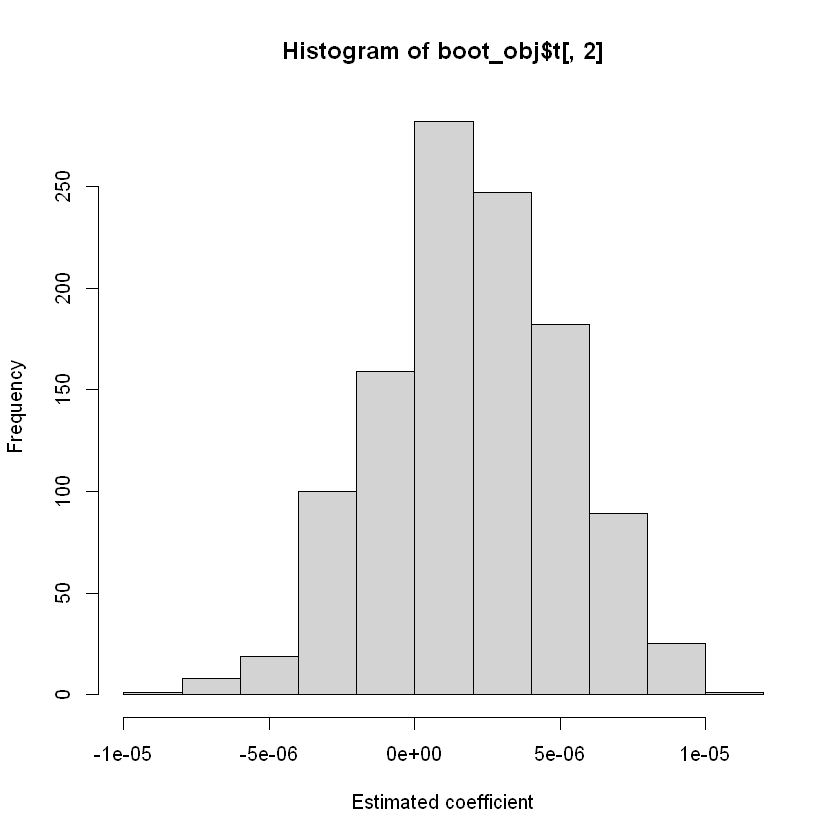

In [100]:
hist(boot_obj$t[,2], xlab="Estimated coefficient") #we get a distribution of all of the estimates
#                               ^^ indexing the second "t" value

# How in God's name do I get a comparable visual display of the predicted data to the actual data, or is that not
# possible because you're binning lm's here, not binning data.frame data necessarily.

In [106]:
install.packages("finalfit")
library(finalfit)

glm_prob_df = data.frame(boot_predict(boot_obj, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')

num_observations = nrow(glm_prob_df)

#Here, smartass:
threshold = .5

glm_prob_df$predicted_binary=rep("Female", num_observations)
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="Male"

confusion_df = data.frame(glm_prob_df$predicted_binary, d1$Gender)
colnames(confusion_df) = c('predicted', 'actual')
table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

Installing package into 'C:/Users/roman/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'bdsmatrix', 'gridExtra', 'mice', 'pROC'




package 'bdsmatrix' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'finalfit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roman\AppData\Local\Temp\RtmpOCqhqA\downloaded_packages


Warning message:
"package 'finalfit' was built under R version 4.2.3"


ERROR: Error in boot_predict(boot_obj, type = "response"): fit must contain an lm or glm model


How robust is the prediction accuracy of the full model?

> *I can't tell you that, but I can tell you I really tried to find out what that is.* 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [36]:
# WRITE YOUR CODE HERE

# First let's make a copy of the data set that we'll keep permuting
permd1 = d1 #want to preserve the non-permuted, true form of data!

# Set the number of iterations
R=1000

# Next make an output object to store the results
perm.coefs=matrix(NA,nrow=R, ncol=2) #filling with nas at first

# Now just write a for loop where we scramble the observations
# in X using the sample() function. We'll scramble the observations in R different ways
for (i in 1:R){
  permd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(1113)] # This is a shuffled version of the Auto$horsepower vector
  perm.coefs[i,]=coef(lm(Gender~FS_Total_GM_Vol, data=permd1)) # then we get coefficients for linear model of shuffled horsepower to auto
}

# Take a look at the null distributions
# It gives you that warnign message 10,000 times because gender was made a factor in the first part of the ass't.

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.respo

Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"
Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


         actual
predicted   F   M
     Male 606 507

[1] "Accuracy: 0"


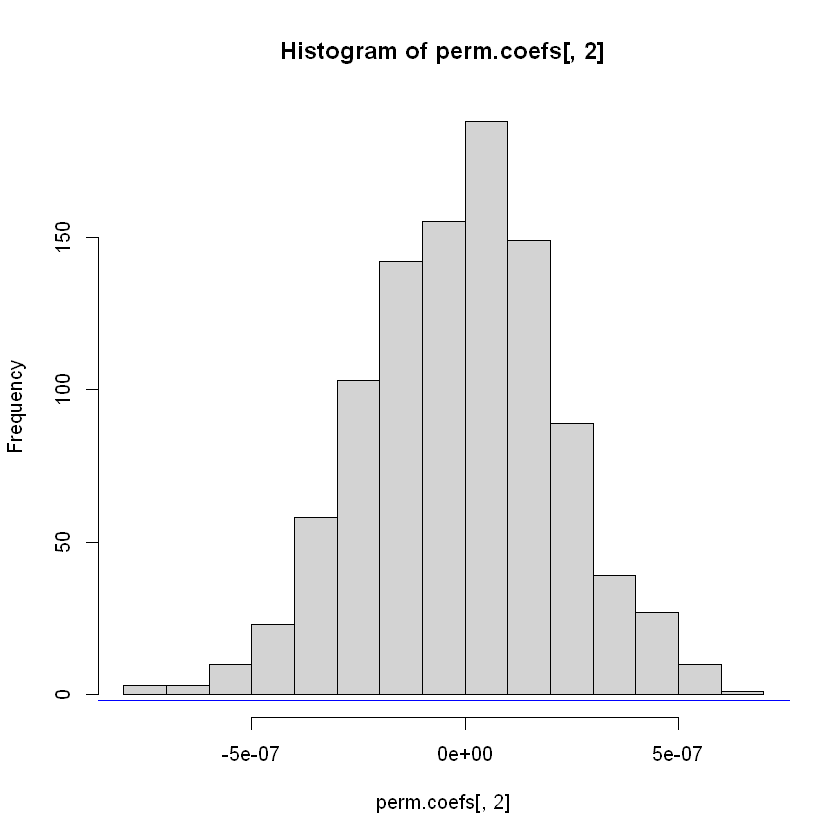

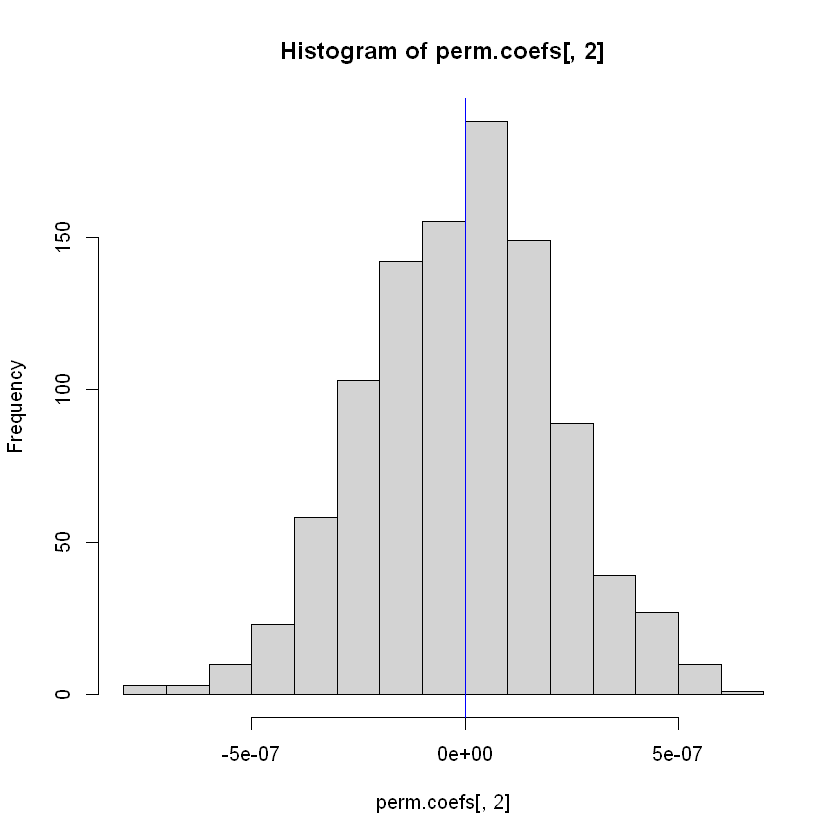

In [107]:
lm.1  <- lm(Gender~FS_Total_GM_Vol, data=d1)


lm_prob_df = data.frame(predict(lm.1, type = "response"))
colnames(lm_prob_df) = c('predicted_prob')

num_observations = nrow(glm_prob_df)

#head(lm_prob_df)
#dim(lm_prob_df)

#Here, smartass:
threshold = .5

lm_prob_df$predicted_binary=rep("Female", num_observations)
lm_prob_df$predicted_binary[lm_prob_df$predicted_prob>threshold]="Male"

#lm_prob_df

#lm.2  <- lm(predicted_binary)

confusion_df.1 = data.frame(lm_prob_df$predicted_binary, d1$Gender)
colnames(confusion_df.1) = c('predicted', 'actual')
table(confusion_df.1)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

v1  <-  mean(confusion_df$predicted == confusion_df$actual)

#The model itself
hist(perm.coefs[,2]) 
abline(lm.1, col="blue")

#The probability only
hist(perm.coefs[,2]) 
abline(v = v1, col="blue")

#ggplot(data = d1) + geom_histogram(binwidth = 5)

How much does the grey matter volume influence the prediction accuracy of the model?

> *It seems like it does not whatsoever. At least, I can say that there is a "1" probability of observing a stronger effect due to chance.*

In [91]:
# Now re-estimate the real (unpermuted) effect 
perm.real = coef(lm(Gender~FS_Total_GM_Vol, data=d1))
perm.real

#sum the coefficients less than the real coefficient estimate 
#and divide by the number of repetitions to get an empirical probability 
perm.p = sum(perm.coefs[,2]<perm.real[2])/R
perm.p

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"
Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


(Intercept) FS_Total_GM_Vol 
  -1.829262e+00    4.788433e-06

[1] 1

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Write your response here* 
> The bootstrap samples with replacment, permutation testing samples without replacement. Permutation testing shuffles your data to ask, "in our sample, is it more likely that we are observing X impact Y in Z way, versus in a random shuffle of our sample values." It introduces new values to your data; bootstrapping uses the preexisting data. It is appropriate to use bootstrapping to tell us more about the range of values one can expect in data, if there were no relationships between our data. It is appropriate to use permutation testing for targeted null hypothesis testing.

**DUE:** 5pm EST, March 29, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*